In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [8]:
ogrenciler=pd.read_csv('../StudentsPerformance.csv')
ogrenciler.columns=['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}

In [6]:
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
ogrenciler.groupby('cinsiyet').mean()

,matematik_notu,okuma_notu,yazma_notu
cinsiyet,,,
female,63.633,72.608,72.467
male,68.728,65.473,63.311


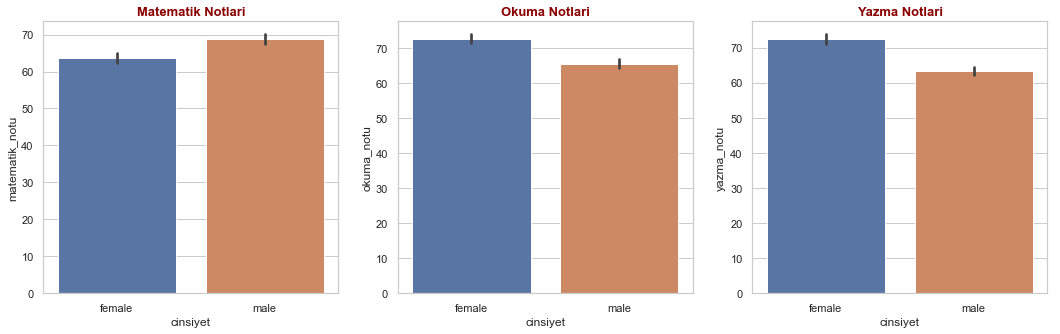

In [11]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler['cinsiyet'],ogrenciler['matematik_notu'])
plt.title('Matematik Notlari',fontdict=baslik_font)

plt.subplot(1,3,2)
sns.barplot(ogrenciler['cinsiyet'],ogrenciler['okuma_notu'])
plt.title('Okuma Notlari',fontdict=baslik_font)

plt.subplot(1,3,3)
sns.barplot(ogrenciler.cinsiyet,ogrenciler.yazma_notu)
plt.title('Yazma Notlari',fontdict=baslik_font)

plt.show()

In [28]:
ttest_ind(ogrenciler[ogrenciler.cinsiyet=='female'][['matematik_notu','okuma_notu','yazma_notu']],
                      ogrenciler[ogrenciler.cinsiyet=='male'][['matematik_notu','okuma_notu','yazma_notu']])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

In [29]:
ogrenciler.groupby('koken').mean()[['matematik_notu','okuma_notu','yazma_notu']]

,matematik_notu,okuma_notu,yazma_notu
koken,,,
group A,61.629,64.674,62.674
group B,63.453,67.353,65.600
group C,64.464,69.103,67.828
group D,67.363,70.031,70.145
group E,73.821,73.029,71.407


In [31]:
kokenler=ogrenciler.koken.unique()
gkoken=ogrenciler.groupby('koken')

In [75]:
for var in ['matematik_notu','okuma_notu','yazma_notu']:
    print('***Karsilastirilan Degisken: {}***\n'.format(var))
    for i in range(0,len(kokenler)):
        for j in range(i+1, len(kokenler)):
            print('{0} ile {1} arasindaki t-test'.format(kokenler[i],kokenler[j]))
            display(ttest_ind(ogrenciler[ogrenciler.koken==kokenler[i]][var],ogrenciler[ogrenciler.koken==kokenler[j]][var])[1])

***Karsilastirilan Degisken: matematik_notu***

group B ile group C arasindaki t-test


0.4647708939167453

group B ile group A arasindaki t-test


0.3503415961659957

group B ile group D arasindaki t-test


0.004886197137104194

group B ile group E arasindaki t-test


5.007946047497971e-09

group C ile group A arasindaki t-test


0.11043810745588042

group C ile group D arasindaki t-test


0.015888349556016285

group C ile group E arasindaki t-test


1.927238849552764e-09

group A ile group D arasindaki t-test


0.0009068636053543751

group A ile group E arasindaki t-test


1.083559122656415e-08

group D ile group E arasindaki t-test


2.3187640326715042e-05

***Karsilastirilan Degisken: okuma_notu***

group B ile group C arasindaki t-test


0.1866592809035069

group B ile group A arasindaki t-test


0.1738735513443721

group B ile group D arasindaki t-test


0.0523786206559701

group B ile group E arasindaki t-test


0.0007951618495240944

group C ile group A arasindaki t-test


0.010364398025471079

group C ile group D arasindaki t-test


0.425771382113019

group C ile group E arasindaki t-test


0.0069132842804986595

group A ile group D arasindaki t-test


0.002488654464332207

group A ile group E arasindaki t-test


6.463395931833847e-05

group D ile group E arasindaki t-test


0.045033306431345586

***Karsilastirilan Degisken: yazma_notu***

group B ile group C arasindaki t-test


0.1110010959814519

group B ile group A arasindaki t-test


0.14475374198993884

group B ile group D arasindaki t-test


0.0014749978881319053

group B ile group E arasindaki t-test


0.0008032300486353951

group C ile group A arasindaki t-test


0.004610690740740428

group C ile group D arasindaki t-test


0.05930232918708209

group C ile group E arasindaki t-test


0.019183539018898285

group A ile group D arasindaki t-test


4.084805733969806e-05

group A ile group E arasindaki t-test


3.483278064499439e-05

group D ile group E arasindaki t-test


0.4104455517392258

Grup A,B,C nin farkli kombinasyonlari disinda anlamli bir fark vardir.

In [43]:
ogrenciler.groupby('aile_egt_seviyesi').mean()

,matematik_notu,okuma_notu,yazma_notu
aile_egt_seviyesi,,,
associate's degree,67.883,70.928,69.896
bachelor's degree,69.390,73.000,73.381
high school,62.138,64.704,62.449
master's degree,69.746,75.373,75.678
some college,67.128,69.460,68.841
some high school,63.497,66.939,64.888


In [38]:
seviyeler=ogrenciler.aile_egt_seviyesi.unique()

In [60]:
for var in ['matematik_notu','okuma_notu','yazma_notu']:
    print('***Karsilastirilan Degisken :{}\n'.format(var))
    for i in range(0,len(seviyeler)):
        for j in range(i+1,len(seviyeler)):
            print('{0} ile {1} arasindaki t-test'.format(seviyeler[i],seviyeler[j]))
            display(ttest_ind(ogrenciler[ogrenciler.aile_egt_seviyesi==seviyeler[i]][var],
                              ogrenciler[ogrenciler.aile_egt_seviyesi==seviyeler[j]][var]))


***Karsilastirilan Degisken :matematik_notu

bachelor's degree ile some college arasindaki t-test


Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)

bachelor's degree ile master's degree arasindaki t-test


Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)

bachelor's degree ile associate's degree arasindaki t-test


Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)

bachelor's degree ile high school arasindaki t-test


Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)

bachelor's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)

some college ile master's degree arasindaki t-test


Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)

some college ile associate's degree arasindaki t-test


Ttest_indResult(statistic=-0.5426842696247527, pvalue=0.5876182809234072)

some college ile high school arasindaki t-test


Ttest_indResult(statistic=3.5461079495681163, pvalue=0.00043498004192453146)

some college ile some high school arasindaki t-test


Ttest_indResult(statistic=2.4117046231407633, pvalue=0.016324361572645503)

master's degree ile associate's degree arasindaki t-test


Ttest_indResult(statistic=0.8411229688563471, pvalue=0.4009993636124658)

master's degree ile high school arasindaki t-test


Ttest_indResult(statistic=3.4893759321890823, pvalue=0.000570929230228812)

master's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=2.6442572081925526, pvalue=0.008736228790471057)

associate's degree ile high school arasindaki t-test


Ttest_indResult(statistic=3.9481325318265013, pvalue=9.247314274963044e-05)

associate's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=2.820053979930256, pvalue=0.005041081492906143)

high school ile some high school arasindaki t-test


Ttest_indResult(statistic=-0.8640629490772553, pvalue=0.388108610360687)

***Karsilastirilan Degisken :okuma_notu

bachelor's degree ile some college arasindaki t-test


Ttest_indResult(statistic=2.2048821209085077, pvalue=0.028127555314401052)

bachelor's degree ile master's degree arasindaki t-test


Ttest_indResult(statistic=-1.0540858949475984, pvalue=0.293296751317879)

bachelor's degree ile associate's degree arasindaki t-test


Ttest_indResult(statistic=1.2977969850452833, pvalue=0.19524206483091092)

bachelor's degree ile high school arasindaki t-test


Ttest_indResult(statistic=5.017577900835298, pvalue=8.804250310784477e-07)

bachelor's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=3.4039270673798745, pvalue=0.0007561971719730451)

some college ile master's degree arasindaki t-test


Ttest_indResult(statistic=-2.888843374950649, pvalue=0.004165440800640354)

some college ile associate's degree arasindaki t-test


Ttest_indResult(statistic=-1.11231882169149, pvalue=0.26660028539980146)

some college ile high school arasindaki t-test


Ttest_indResult(statistic=3.4578427683620334, pvalue=0.0006001048481252139)

some college ile some high school arasindaki t-test


Ttest_indResult(statistic=1.714161972758909, pvalue=0.08726786856243877)

master's degree ile associate's degree arasindaki t-test


Ttest_indResult(statistic=2.1912015759838686, pvalue=0.02926414570972208)

master's degree ile high school arasindaki t-test


Ttest_indResult(statistic=5.113158728723479, pvalue=6.257558119816816e-07)

master's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=3.7261574122231513, pvalue=0.00024334552617191513)

associate's degree ile high school arasindaki t-test


Ttest_indResult(statistic=4.538021419898998, pvalue=7.4421677971357816e-06)

associate's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=2.7183602204037927, pvalue=0.006846770119677965)

high school ile some high school arasindaki t-test


Ttest_indResult(statistic=-1.4612847575915553, pvalue=0.14477919552482746)

***Karsilastirilan Degisken :yazma_notu

bachelor's degree ile some college arasindaki t-test


Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)

bachelor's degree ile master's degree arasindaki t-test


Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)

bachelor's degree ile associate's degree arasindaki t-test


Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)

bachelor's degree ile high school arasindaki t-test


Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)

bachelor's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)

some college ile master's degree arasindaki t-test


Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)

some college ile associate's degree arasindaki t-test


Ttest_indResult(statistic=-0.7615968643953912, pvalue=0.44670316603036575)

some college ile high school arasindaki t-test


Ttest_indResult(statistic=4.488520877492127, pvalue=9.275017802620877e-06)

some college ile some high school arasindaki t-test


Ttest_indResult(statistic=2.5757211403792417, pvalue=0.010358529086081357)

master's degree ile associate's degree arasindaki t-test


Ttest_indResult(statistic=2.78124154906855, pvalue=0.00578403270525775)

master's degree ile high school arasindaki t-test


Ttest_indResult(statistic=6.360904883721531, pvalue=9.326930296880332e-10)

master's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=4.707583817143559, pvalue=4.275465153074631e-06)

associate's degree ile high school arasindaki t-test


Ttest_indResult(statistic=5.348725635626432, pvalue=1.4650545536741998e-07)

associate's degree ile some high school arasindaki t-test


Ttest_indResult(statistic=3.3317223453475715, pvalue=0.0009435990258795855)

high school ile some high school arasindaki t-test


Ttest_indResult(statistic=-1.5838885273076473, pvalue=0.11406653932963291)

In [73]:
ogrenciler.groupby('ogle_yemegi').mean()

,matematik_notu,okuma_notu,yazma_notu
ogle_yemegi,,,
free/reduced,58.921,64.654,63.023
standard,70.034,71.654,70.823


In [52]:
ytipi=ogrenciler.ogle_yemegi.unique()

In [74]:
for tp in ['matematik_notu','okuma_notu','yazma_notu']:
    print('\nKarsilastirdigimiz Degisken: {}\n'.format(tp))
    for i in range(0,len(ytipi)):
        for j in range(i+1,len(ytipi)):
            print('{0} ile {1} arasindaki t-test'.format(ytipi[i],ytipi[j]))
            print(ttest_ind(ogrenciler[ogrenciler.ogle_yemegi==ytipi[i]][tp],
                            ogrenciler[ogrenciler.ogle_yemegi==ytipi[j]][tp]))


Karsilastirdigimiz Degisken: matematik_notu

standard ile free/reduced arasindaki t-test
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)

Karsilastirdigimiz Degisken: okuma_notu

standard ile free/reduced arasindaki t-test
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)

Karsilastirdigimiz Degisken: yazma_notu

standard ile free/reduced arasindaki t-test
Ttest_indResult(statistic=8.009784197834758, pvalue=3.1861895831664765e-15)


Standart yemek yiyenler daha basarilidir.

In [66]:
hkrs=ogrenciler.hazirlik_kursu.unique()

In [68]:
for tp in ['matematik_notu','okuma_notu','yazma_notu']:
    print('\nKarsilastirdigimiz Degisken: {}\n'.format(tp))
    for i in range(0,len(hkrs)):
        for j in range(i+1,len(hkrs)):
            print('{0} ile {1} arasindaki t-test'.format(hkrs[i],hkrs[j]))
            print(ttest_ind(ogrenciler[ogrenciler.hazirlik_kursu==hkrs[i]][tp],
                            ogrenciler[ogrenciler.hazirlik_kursu==hkrs[j]][tp]))


Karsilastirdigimiz Degisken: matematik_notu

none ile completed arasindaki t-test
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)

Karsilastirdigimiz Degisken: okuma_notu

none ile completed arasindaki t-test
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)

Karsilastirdigimiz Degisken: yazma_notu

none ile completed arasindaki t-test
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


Tamamlanan hazirlik kurslarina gidenler daha basarilidir.Aralarindaki fark istatistiksel olarak anlamlidir.

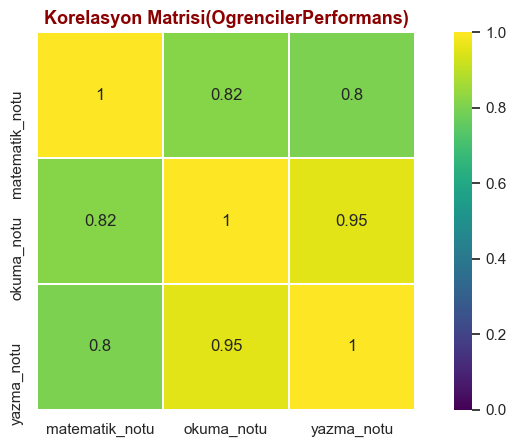

In [72]:
plt.figure(figsize=(10,5))
sns.heatmap(ogrenciler.corr(),square=True,annot=True,linewidths=.5,vmin=0,vmax=1,cmap='viridis')
plt.title('Korelasyon Matrisi(OgrencilerPerformans)',fontdict=baslik_font)
plt.show()


Birbiri ile korelasyonu en fazla olan dersler okuma ve yazma dersidir.